## **Statistiques descriptives sur les bases de données matchées**

In [47]:
import pandas as pd
import numpy as np 
import seaborn as sns
from helpers2 import S3Connection
import helpers2 
import matplotlib.pyplot as plt
import stat


#### **Ouverture des données**

In [48]:
matching3 = pd.read_csv("result3%.csv")
matching5 = pd.read_csv("result5%.csv")
matching10 = pd.read_csv("result10%.csv")
df5 = pd.read_csv("dataframefinal_5%.csv")
matching10.columns

/tmp/ipykernel_29834/764679960.py:1: DtypeWarning: Columns (15,58,60,62,65,67,75) have mixed types. Specify dtype option on import or set low_memory=False.
  matching3 = pd.read_csv("result3%.csv")
/tmp/ipykernel_29834/764679960.py:2: DtypeWarning: Columns (15,58,60,62,65,67,75) have mixed types. Specify dtype option on import or set low_memory=False.
  matching5 = pd.read_csv("result5%.csv")
/tmp/ipykernel_29834/764679960.py:3: DtypeWarning: Columns (15,58,60,62,65,67,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  matching10 = pd.read_csv("result10%.csv")
/tmp/ipykernel_29834/764679960.py:4: DtypeWarning: Columns (15,26,48,58,60,62,65,67,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv("dataframefinal_5%.csv")


Index(['Date_réception_DPE', 'Date_établissement_DPE', 'Modèle_DPE',
       'Date_fin_validité_DPE', 'Version_DPE', 'Méthode_application_DPE',
       'Etiquette_DPE', 'Etiquette_GES', 'Année_construction', 'Type_bâtiment',
       'Période_construction', 'Surface_habitable_logement', 'Adresse_brute',
       'Nom__commune_(BAN)', 'Code_INSEE_(BAN)', 'N°_voie_(BAN)',
       'Identifiant__BAN', 'Adresse_(BAN)', 'Code_postal_(BAN)', 'Score_BAN',
       'Nom__rue_(BAN)', 'Coordonnée_cartographique_X_(BAN)',
       'Coordonnée_cartographique_Y_(BAN)', 'Code_postal_(brut)',
       'N°_étage_appartement', 'Nom_résidence', 'Cage_d'escalier',
       'Complément_d'adresse_logement', 'Statut_géocodage',
       'Nom__commune_(Brut)', 'N°_département_(BAN)', 'N°_région_(BAN)',
       'Complément_d'adresse_bâtiment', 'Adresse_Normalisee',
       'Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No d

### **Analyse de la base de données matching3**

In [49]:
print("Nombre de lignes par colonnes:", len(matching3))
total_nan = matching3.isna().sum().sum()
print(f"Nombre total de NaN : {total_nan}")
nan_par_colonne = matching3.isna().sum()
top_10_nan_colonnes = nan_par_colonne.sort_values(ascending=False).head(10)
print("Les 10 colonnes avec le plus de NaN :")
print(top_10_nan_colonnes)

Nombre de lignes par colonnes: 69313
Nombre total de NaN : 1731651
Les 10 colonnes avec le plus de NaN :
Reference document            69313
1 Articles CGI                69313
4 Articles CGI                69313
5 Articles CGI                69313
3 Articles CGI                69313
Identifiant local             69313
No Volume                     69313
2 Articles CGI                69313
Identifiant de document       69313
Surface Carrez du 5eme lot    69305
dtype: int64


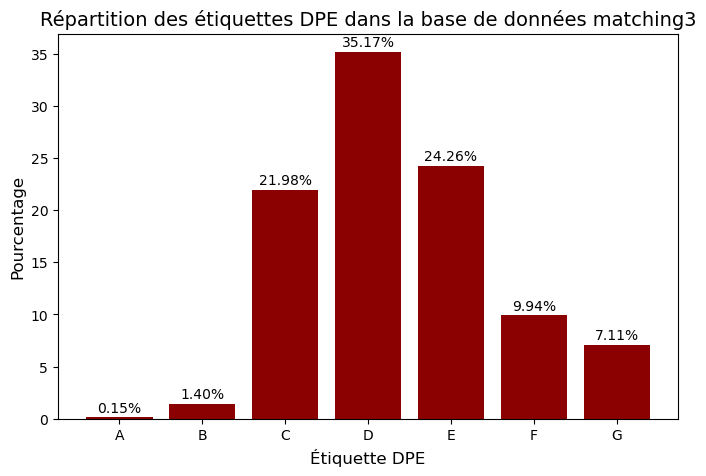

In [50]:
resultat_dpe_matching3 = matching3["Etiquette_DPE"].value_counts(normalize=True) * 100

resultat_dpe_matching3 = resultat_dpe_matching3.reindex(sorted(resultat_dpe_matching3.index))

# Histogramme des étiquettes DPE dans la base de données 
fig, ax = plt.subplots(figsize=(8, 5))

# Histogramme
ax.bar(resultat_dpe_matching3.index, resultat_dpe_matching3.values, color='darkred')

# Titres et labels
ax.set_title("Répartition des étiquettes DPE dans la base de données matching3", fontsize=14)
ax.set_xlabel("Étiquette DPE", fontsize=12)
ax.set_ylabel("Pourcentage", fontsize=12)

# Ajout des valeurs sur les barres
for i, v in enumerate(resultat_dpe_matching3):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

# Affichage du graphique
plt.show()

Semble honnête après matching des bases (neufs et existants).

##### **Répartition des étiquettes DPE dans chaque département**
Nous avons fait le choix de filtrer les données pour les codes départements allant de 01 à 101 et d'éliminer les quelques logements dont les informations étaient erronées.

In [51]:
matching3["N°_département_(BAN)"] = pd.to_numeric(matching3["N°_département_(BAN)"], errors="coerce")
match3_filtre101 = matching3[matching3["N°_département_(BAN)"] <= 101]
match3_filtre101["N°_département_(BAN)"] = match3_filtre101["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)
resultat = match3_filtre101.groupby("N°_département_(BAN)")["Etiquette_DPE"].value_counts(normalize=True).unstack() * 100
pd.options.display.float_format = "{:.2f}%".format
print(resultat)

# Trouver le département avec le plus de logements en A et G
logements_A = match3_filtre101[match3_filtre101["Etiquette_DPE"] == "A"]
logements_G = match3_filtre101[match3_filtre101["Etiquette_DPE"] == "G"]
logements_A_count = logements_A["N°_département_(BAN)"].value_counts()
logements_G_count = logements_G["N°_département_(BAN)"].value_counts()
departement_max_A = logements_A_count.idxmax()
departement_max_G = logements_G_count.idxmax()
print(f"Le département avec le plus de logements en A : {departement_max_A} ({logements_A_count.max()} logements)")
print(f"Le département avec le plus de logements en G : {departement_max_G} ({logements_G_count.max()} logements)")

Etiquette_DPE            A      B      C      D      E      F      G
N°_département_(BAN)                                                
10                   0.90%    NaN 11.31% 36.65% 33.03% 14.03%  4.07%
11                   2.92% 12.41% 42.34% 31.39%  7.30%  2.92%  0.73%
12                     NaN    NaN 13.41% 45.12% 30.49%  6.10%  4.88%
13                   4.26% 10.05% 46.17% 24.36% 11.75%  2.21%  1.19%
14                     NaN  1.07% 15.51% 36.90% 32.62%  6.95%  6.95%
...                    ...    ...    ...    ...    ...    ...    ...
91                   0.17%  1.31% 21.22% 34.11% 27.90% 11.12%  4.16%
92                   0.03%  0.82% 14.14% 28.86% 29.10% 13.91% 13.13%
93                   0.11%  1.20% 19.64% 32.49% 23.80% 11.27% 11.49%
94                   0.03%  1.76% 16.94% 32.55% 27.30% 12.47%  8.95%
95                     NaN  1.11% 19.83% 34.56% 29.94%  9.50%  5.06%

[82 rows x 7 columns]
Le département avec le plus de logements en A : 13 (25 logements)
Le département

IL semble qu'on ait perdu les 9 premiers départements (Ain, Aisne, Allier...)

/tmp/ipykernel_29834/469139696.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_29834/469139696.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_29834/469139696.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.te

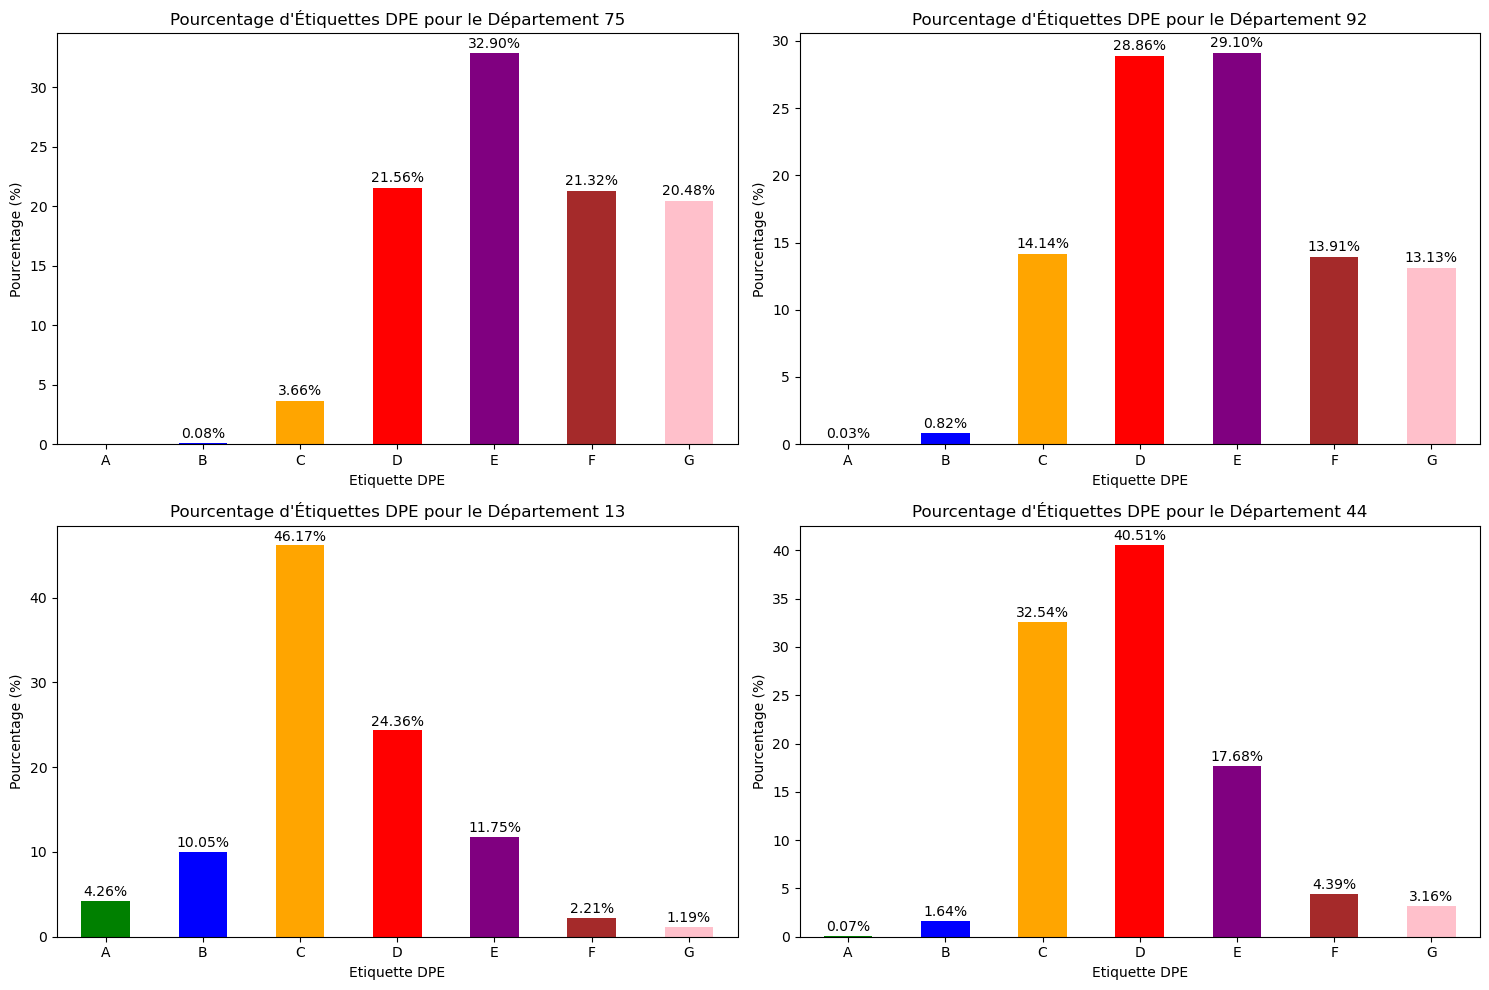

In [52]:
departements = ["75", "92", "13", "44"]

# Histogramme pour chaque département
plt.figure(figsize=(15, 10))

for i, dep in enumerate(departements, 1):
    plt.subplot(2, 2, i)  
    resultat_dep = resultat.loc[dep]  
    
    # Histogramme pour chaque département
    resultat_dep.plot(kind='bar', color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    plt.title(f"Pourcentage d'Étiquettes DPE pour le Département {dep}", fontsize=12)
    plt.xlabel("Etiquette DPE", fontsize=10)
    plt.ylabel("Pourcentage (%)", fontsize=10)
    for j in range(len(resultat_dep)):
        plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Effectivement pas de départements 01, 02... 09.

In [74]:
print(matching3['Type_bâtiment'])

0        appartement
1        appartement
2        appartement
3        appartement
4        appartement
            ...     
69308    appartement
69309    appartement
69310    appartement
69311    appartement
69312    appartement
Name: Type_bâtiment, Length: 69313, dtype: object


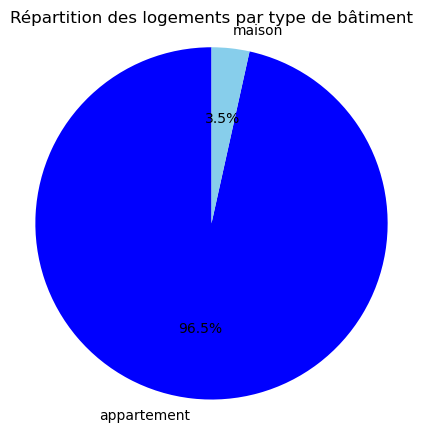

Pourcentages d'étiquettes DPE par type de bâtiment:
Etiquette_DPE     A     B      C      D      E      F     G
Type_bâtiment                                              
appartement   0.13% 1.36% 21.90% 35.03% 24.33% 10.03% 7.21%
maison        0.79% 2.50% 24.13% 38.94% 22.13%  7.36% 4.16%

Le type de bâtiment avec le plus de logements en A : appartement (86 logements)
Le type de bâtiment avec le plus de logements en E : appartement (16280 logements)


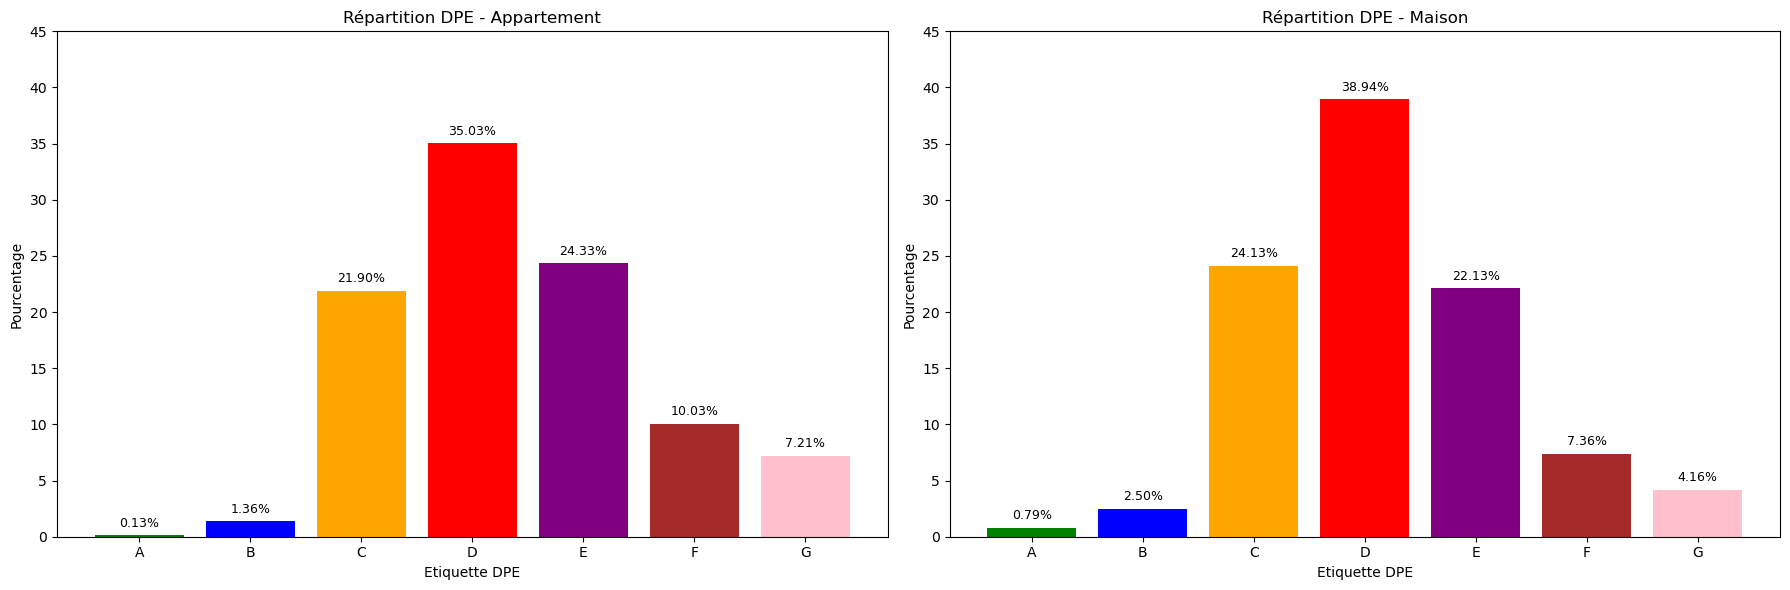

In [53]:
repartition_batiment = matching3['Type_bâtiment'].value_counts()

# Camembert
plt.figure(figsize=(5, 5))
plt.pie(repartition_batiment, labels=repartition_batiment.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'skyblue', 'darkblue'])
plt.title("Répartition des logements par type de bâtiment")
plt.axis('equal') 
plt.show()

# Filtrer les données par 'Type_batiment' et 'Etiquette_DPE'
resultat_batiment = matching3.groupby(['Type_bâtiment', 'Etiquette_DPE']).size().unstack(fill_value=0)
resultat_batiment_percentage = (resultat_batiment.T / resultat_batiment.sum(axis=1)).T * 100
print("Pourcentages d'étiquettes DPE par type de bâtiment:")
print(resultat_batiment_percentage)

# Bâtiment avec le plus de logements en A et en E
logements_A_batiment = matching3[matching3["Etiquette_DPE"] == "A"]
logements_A_batiment_count = logements_A_batiment.groupby("Type_bâtiment").size()
logements_E_batiment = matching3[matching3["Etiquette_DPE"] == "E"]
logements_E_batiment_count = logements_E_batiment.groupby("Type_bâtiment").size()
type_batiment_max_A = logements_A_batiment_count.idxmax()
type_batiment_max_E = logements_E_batiment_count.idxmax()
print(f"\nLe type de bâtiment avec le plus de logements en A : {type_batiment_max_A} ({logements_A_batiment_count.max()} logements)")
print(f"Le type de bâtiment avec le plus de logements en E : {type_batiment_max_E} ({logements_E_batiment_count.max()} logements)")

# Histogrammes pour chaque type de bâtiment
types_batiment = ['appartement', 'maison']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
for i, batiment in enumerate(types_batiment):
    data = resultat_batiment_percentage.loc[batiment]
    bars = axes[i].bar(data.index, data.values, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    
    axes[i].set_title(f"Répartition DPE - {batiment.capitalize()}")
    axes[i].set_xlabel("Etiquette DPE")
    axes[i].set_ylabel("Pourcentage")
    axes[i].set_ylim(0, 45)  
    axes[i].tick_params(axis='x', rotation=0) 

    # Affichage des valeurs au-dessus de chaque barre
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.2f}%", 
                     ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

In [54]:
print(matching3['Valeur fonciere'])


0        145500,00
1        320100,00
2         86000,00
3         86000,00
4        153000,00
           ...    
69308     75000,00
69309    110000,00
69310     55000,00
69311    220000,00
69312    166250,00
Name: Valeur fonciere, Length: 69313, dtype: object


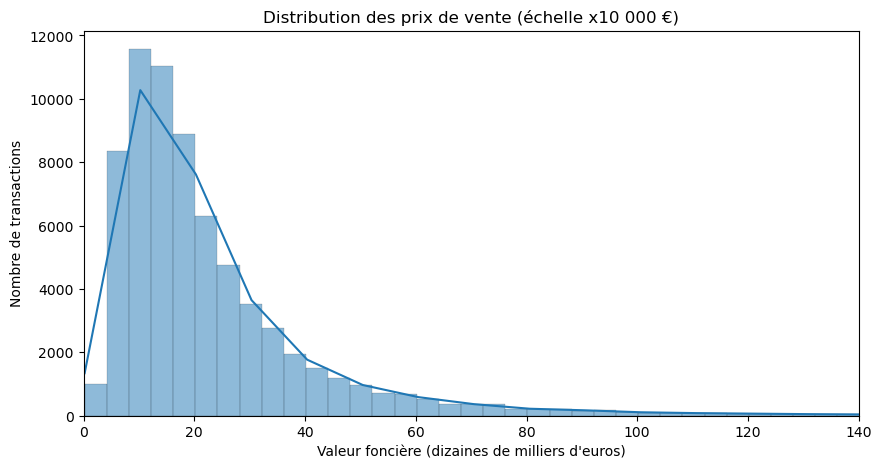

In [73]:
# Nettoyage
matching3['Valeur fonciere (num)'] = (
    matching3['Valeur fonciere']
    .astype(str)
    .str.replace(',', '.', regex=False)
)
matching3['Valeur fonciere (num)'] = pd.to_numeric(matching3['Valeur fonciere (num)'], errors='coerce')

# Optionnel : enlever les lignes où la conversion a échoué
matching3_clean = matching3[matching3['Valeur fonciere (num)'].notna()]

# Affichage
plt.figure(figsize=(10, 5))

# Diviser les valeurs par 10 000 pour les afficher en dizaines de milliers d'euros
sns.histplot(matching3_clean['Valeur fonciere (num)'] / 10_000, bins=500, kde=True)

# Limite à 99e percentile, aussi divisée par 10 000
plt.xlim(0, matching3_clean['Valeur fonciere (num)'].quantile(0.99) / 10_000)

# Noms des axes et titre
plt.xlabel("Valeur foncière (dizaines de milliers d'euros)")
plt.ylabel("Nombre de transactions")
plt.title("Distribution des prix de vente (échelle x10 000 €)")
plt.show()


### **Analyse de la base de données matching5**

In [56]:
print("Nombre de lignes par colonnes:", len(matching5))
total_nan = matching5.isna().sum().sum()
print(f"Nombre total de NaN : {total_nan}")
nan_par_colonne = matching5.isna().sum()
top_10_nan_colonnes = nan_par_colonne.sort_values(ascending=False).head(10)
print("Les 10 colonnes avec le plus de NaN :")
print(top_10_nan_colonnes)

Nombre de lignes par colonnes: 77148
Nombre total de NaN : 1926769
Les 10 colonnes avec le plus de NaN :
Reference document            77148
1 Articles CGI                77148
4 Articles CGI                77148
5 Articles CGI                77148
3 Articles CGI                77148
Identifiant local             77148
No Volume                     77148
2 Articles CGI                77148
Identifiant de document       77148
Surface Carrez du 5eme lot    77138
dtype: int64


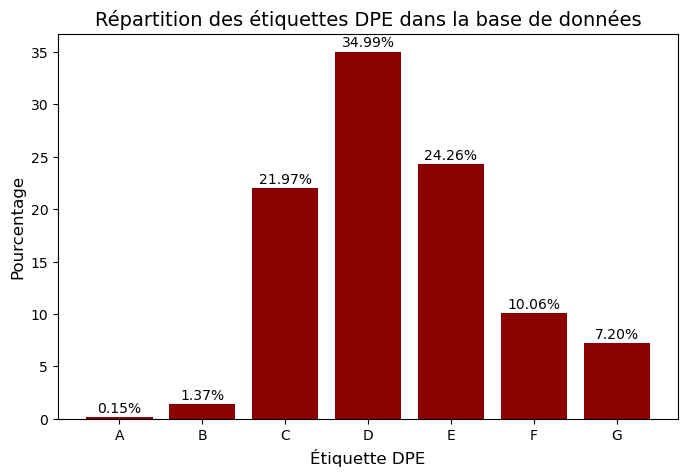

In [57]:
resultat_dpe_matching5 = matching5["Etiquette_DPE"].value_counts(normalize=True) * 100

resultat_dpe_matching5 = resultat_dpe_matching5.reindex(sorted(resultat_dpe_matching5.index))

# Histogramme des étiquettes DPE dans la base de données 
fig, ax = plt.subplots(figsize=(8, 5))

# Histogramme
ax.bar(resultat_dpe_matching5.index, resultat_dpe_matching5.values, color='darkred')

# Titres et labels
ax.set_title("Répartition des étiquettes DPE dans la base de données", fontsize=14)
ax.set_xlabel("Étiquette DPE", fontsize=12)
ax.set_ylabel("Pourcentage", fontsize=12)

# Ajout des valeurs sur les barres
for i, v in enumerate(resultat_dpe_matching5):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

# Affichage du graphique
plt.show()

La base matchée (**66 525 observations**) reflète davantage la répartition des **logements existants** (**4 537 525 observations**) que celle des **logements neufs** (**537 952 observations**). Alors que les logements neufs sont majoritairement classés **A, B et C**, la base matchée est dominée par les classes **C (24.91%), D (37.18%) et E (22.87%)**, soit **85% des logements**, une répartition proche des logements existants.  

De plus, les logements les plus performants (**A : 0.17%, B : 1.58%**) sont presque absents, et les classes énergivores **F et G** restent minoritaires mais comparables aux logements anciens. La forte proportion initiale de logements existants dans les données a probablement influencé ce résultat, rendant la base matchée **peu représentative de l’ensemble du parc immobilier**, avec une sous-représentation marquée des logements neufs.

##### **Répartition des étiquettes DPE dans chaque département**
Nous avons fait le choix de filtrer les données pour les codes départements allant de 01 à 101 et d'éliminer les quelques logements dont les informations étaient erronées.

In [58]:
matching5["N°_département_(BAN)"] = pd.to_numeric(matching5["N°_département_(BAN)"], errors="coerce")
match5_filtre101 = matching5[matching5["N°_département_(BAN)"] <= 101]
match5_filtre101["N°_département_(BAN)"] = match5_filtre101["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)
resultat = match5_filtre101.groupby("N°_département_(BAN)")["Etiquette_DPE"].value_counts(normalize=True).unstack() * 100
pd.options.display.float_format = "{:.2f}%".format
print(resultat)

# Trouver le département avec le plus de logements en A et G
logements_A = match5_filtre101[match5_filtre101["Etiquette_DPE"] == "A"]
logements_G = match5_filtre101[match5_filtre101["Etiquette_DPE"] == "G"]
logements_A_count = logements_A["N°_département_(BAN)"].value_counts()
logements_G_count = logements_G["N°_département_(BAN)"].value_counts()
departement_max_A = logements_A_count.idxmax()
departement_max_G = logements_G_count.idxmax()
print(f"Le département avec le plus de logements en A : {departement_max_A} ({logements_A_count.max()} logements)")
print(f"Le département avec le plus de logements en G : {departement_max_G} ({logements_G_count.max()} logements)")

Etiquette_DPE            A      B      C      D      E      F      G
N°_département_(BAN)                                                
10                   0.80%    NaN 10.76% 37.45% 31.47% 13.94%  5.58%
11                   2.44% 11.59% 38.41% 35.98%  8.54%  2.44%  0.61%
12                     NaN    NaN 16.33% 45.92% 27.55%  6.12%  4.08%
13                   4.20%  9.64% 46.97% 23.33% 12.44%  2.18%  1.24%
14                     NaN  0.90% 14.38% 37.08% 33.26%  8.09%  6.29%
...                    ...    ...    ...    ...    ...    ...    ...
91                   0.16%  1.30% 22.33% 33.78% 27.25% 10.83%  4.35%
92                   0.06%  0.82% 14.02% 28.35% 29.23% 14.41% 13.12%
93                   0.10%  1.32% 19.07% 32.25% 23.77% 11.47% 12.01%
94                   0.03%  1.71% 16.76% 32.31% 27.83% 12.31%  9.06%
95                     NaN  1.04% 20.30% 34.59% 29.73%  9.32%  5.02%

[82 rows x 7 columns]
Le département avec le plus de logements en A : 13 (27 logements)
Le département

Répartition proche de celle des logements existants, avec une majorité de C, D et E. Les départements comme le 92, 93 et 94 montrent une part importante de logements D et E, similaire aux logements anciens. À l’inverse, les classes A et B sont fortement réduites, sauf dans certains cas isolés (ex : département 13 avec 27 logements en A).

Attention les départements commencent à 10.

In [59]:
# Nombre total de logements par étiquette DPE pour le département 75
logements_75 = match5_filtre101[match5_filtre101["N°_département_(BAN)"] == "75"]
logements_75_count = logements_75["Etiquette_DPE"].value_counts()
print("\nNombre total de logements par étiquette DPE pour le département 75 :")
print(logements_75_count)


Nombre total de logements par étiquette DPE pour le département 75 :
Etiquette_DPE
E    3499
F    2292
D    2261
G    2186
C     378
B       7
Name: count, dtype: int64


/tmp/ipykernel_29834/1072597135.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')


KeyError: '01'

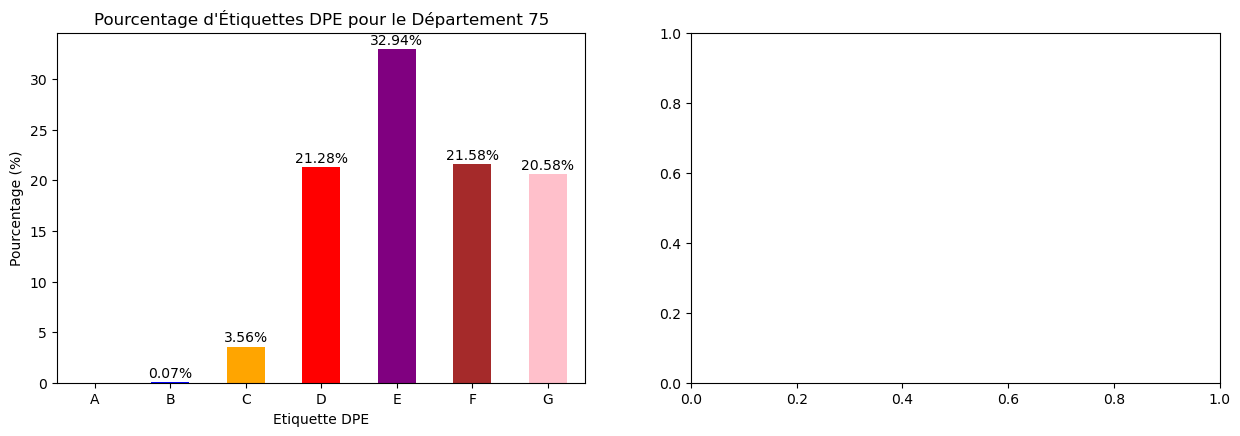

In [60]:
departements = ["75", "01", "13", "44"]

# Histogramme pour chaque département
plt.figure(figsize=(15, 10))

for i, dep in enumerate(departements, 1):
    plt.subplot(2, 2, i)  
    resultat_dep = resultat.loc[dep]  
    
    # Histogramme pour chaque département
    resultat_dep.plot(kind='bar', color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    plt.title(f"Pourcentage d'Étiquettes DPE pour le Département {dep}", fontsize=12)
    plt.xlabel("Etiquette DPE", fontsize=10)
    plt.ylabel("Pourcentage (%)", fontsize=10)
    for j in range(len(resultat_dep)):
        plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()